# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [4]:
pip install matplotlib


     ---------------------------------------- 7.2/7.2 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 164.1/164.1 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 960.8/960.8 kB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00


EXPLORE THE LABEL

C:\Users\ckimutai\AppData\Local\Temp\ipykernel_20628\2972925729.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


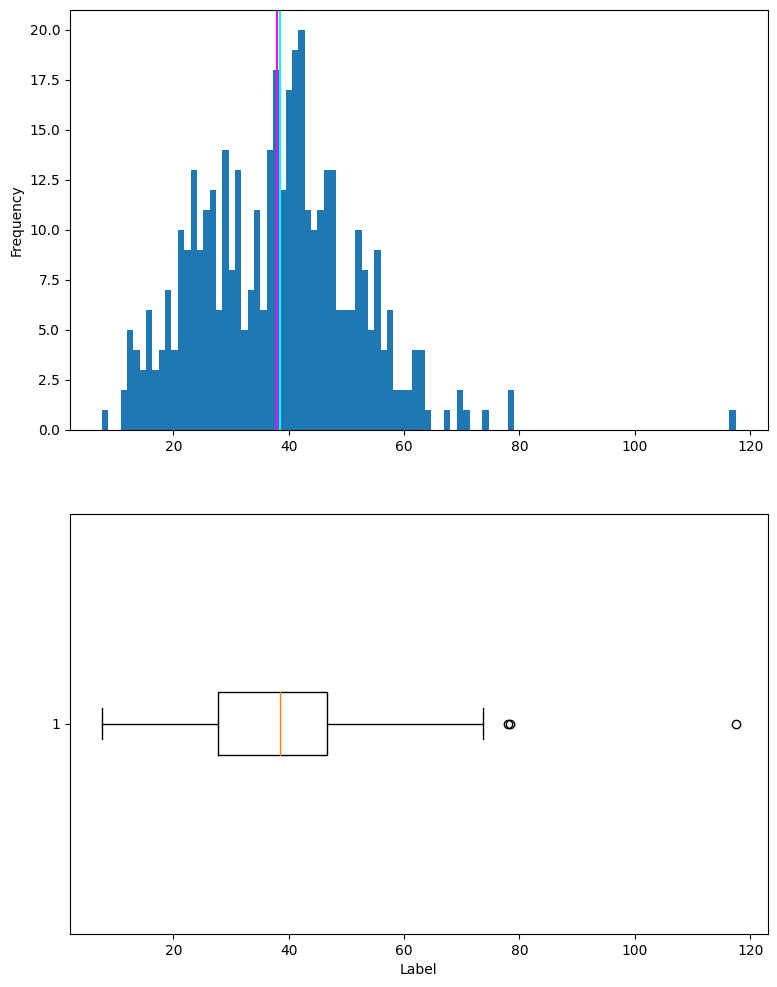

In [7]:
# Your code to explore data and train a regression model
import matplotlib.pyplot as plt
%matplotlib inline

label=data[data.columns[-1]]

fig, ax=plt.subplots(2,1,figsize=(9,12))
ax[0].hist(label,bins=100)
ax[0].set_ylabel('Frequency')


ax[0].axvline(label.mean(),color='magenta')
ax[0].axvline(label.median(),color='cyan')


ax[1].boxplot(label,vert=False)
ax[1].set_xlabel('Label')

fig.show()


FROM BOXPLOT WE SEE OUTLIERS,LETS REMOVE THEM

C:\Users\ckimutai\AppData\Local\Temp\ipykernel_20628\447337008.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


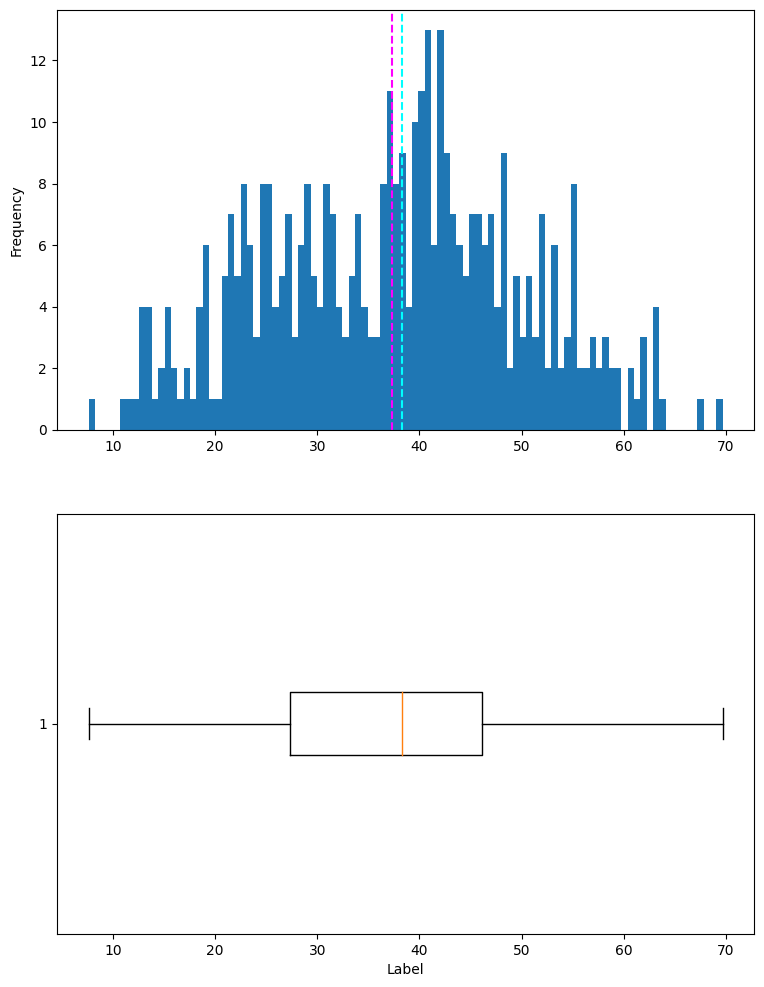

In [10]:
data=data[data['price_per_unit']<70]

label=data[data.columns[-1]]

fig, ax=plt.subplots(2,1,figsize=(9,12))
ax[0].hist(label,bins=100)
ax[0].set_ylabel('Frequency')


ax[0].axvline(label.mean(),color='magenta',linestyle='dashed')
ax[0].axvline(label.median(),color='cyan',linestyle='dashed')


ax[1].boxplot(label,vert=False)
ax[1].set_xlabel('Label')

fig.show()

CHECKING CORRELATION

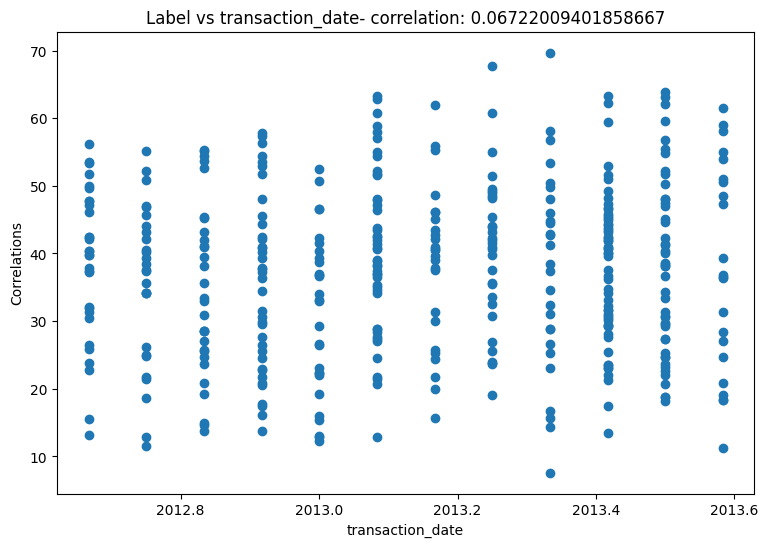

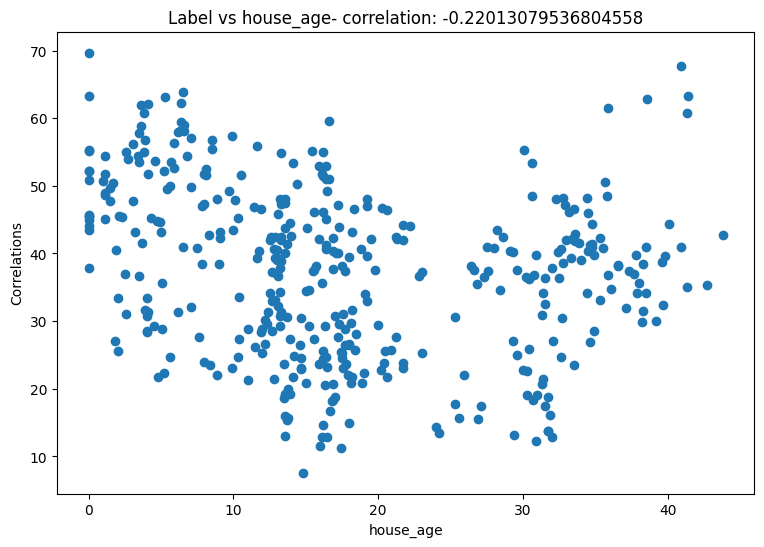

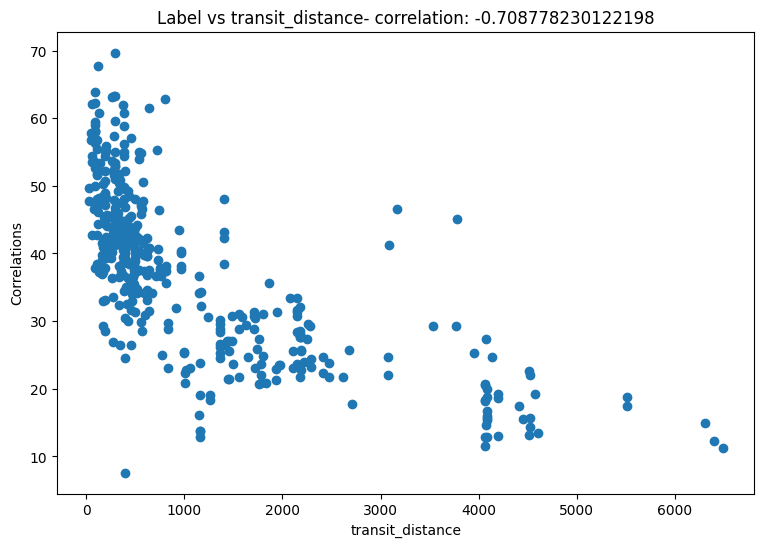

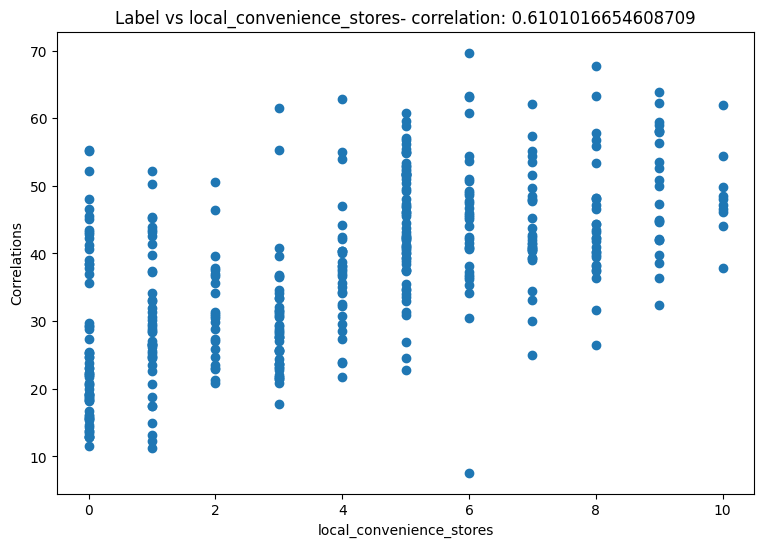

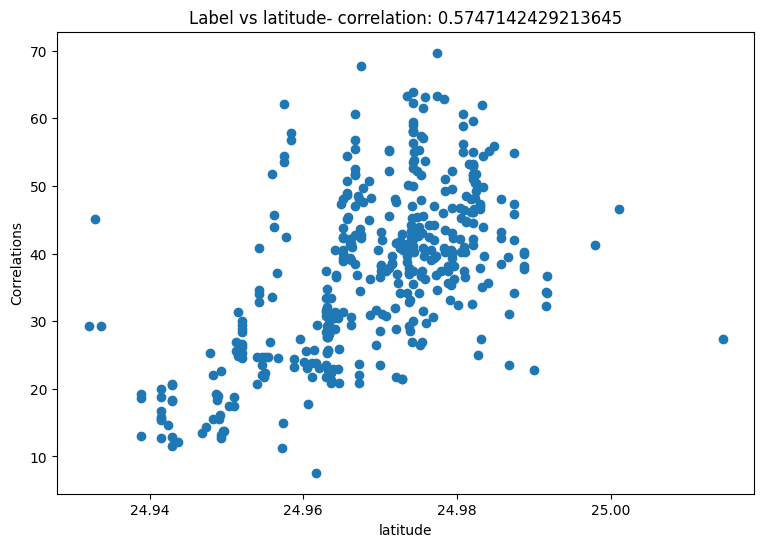

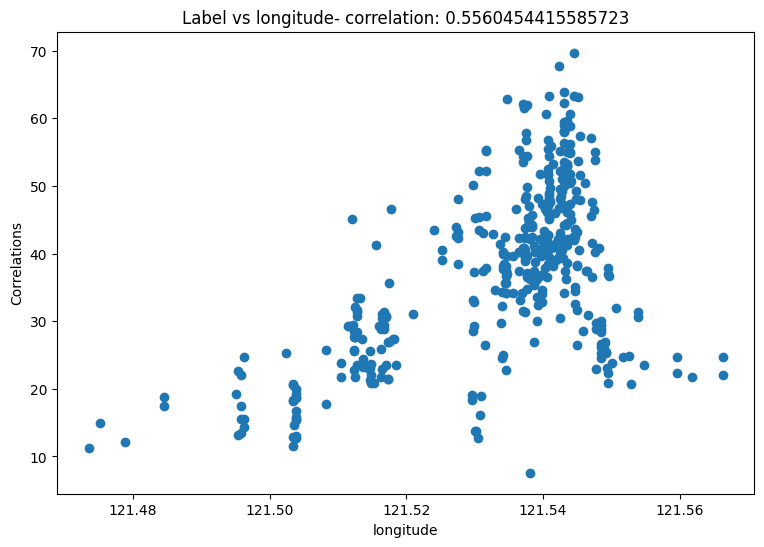

In [16]:
from statistics import correlation


for col in data[data.columns[0:-1]]:
    fig = plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=data[col]
    correlation = feature.corr(label)
    plt.scatter(feature,label)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col + '- correlation: ' + str(correlation))
plt.show()    

### VIEW CATEGORICAL FEATURES

(**transaction_date** and **local_convenience_stores** seem to be discrete values, so might work better if treated as categorical features)

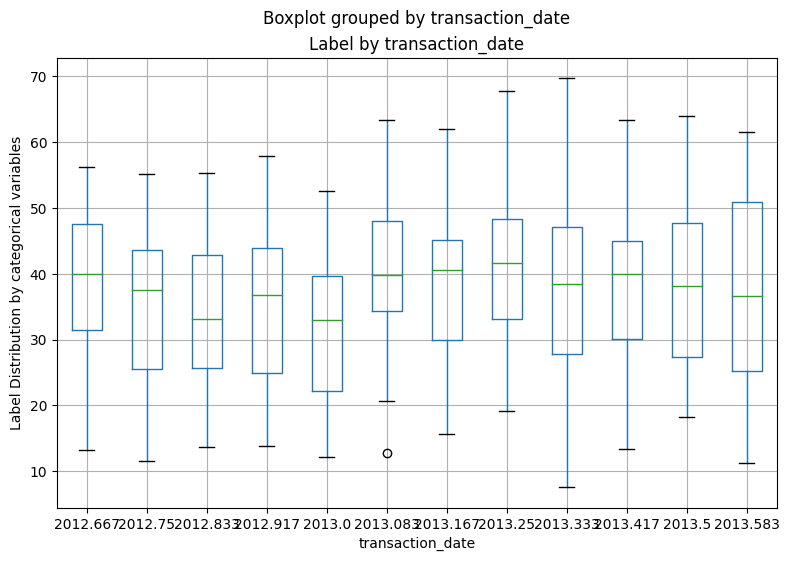

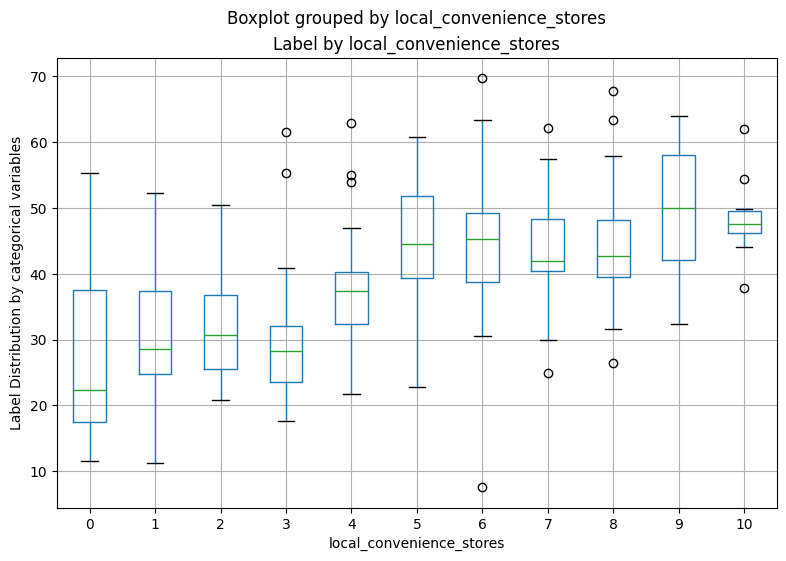

In [19]:
for col in data[['transaction_date','local_convenience_stores']]:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    data.boxplot(column='price_per_unit',by=col,ax=ax)
    ax.set_title('Label by '+col)
    ax.set_ylabel("Label Distribution by categorical variables")
plt.show()    


In [21]:
pip install scikit-learn


     ---------------------------------------- 7.4/7.4 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 40.1/40.1 MB 3.5 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 4.6 MB/s eta 0:00:00


### LETS OMIT transaction date as doesn't seem to be very predictive

In [32]:
from sklearn.model_selection import train_test_split
#separate features and labels
X,y=data[data.columns[1:-1]].values,data[data.columns[-1]].values

#split 70-30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

print('Training set:%d,rows\n Test set:%d rows'% (X_train.shape[0],X_test.shape[0]))

Training set:285,rows
 Test set:123 rows


### Preprocess the data and train in a pipeline

Normalize the numeric features,then use a RandomForestRgressor to train a model

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


### Evaluate the model

MSE: 36.161708217120186
RMSE: 6.0134605858124806
R2: 0.6914305103878833


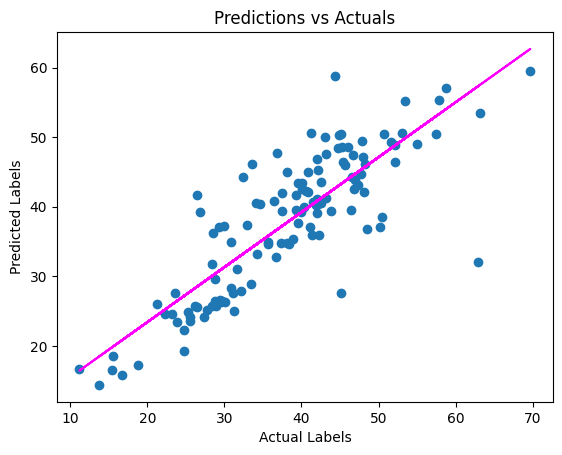

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [40]:
# Your code to use the trained model
import joblib
#save the model as a pickle file
filename= './real_estate_model.pk1'
joblib.dump(model,filename)

loaded_model=joblib.load(filename)

X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])
results=loaded_model.predict(X_new)
for prediction in results:
    print(prediction)                  

49.07726666666665
16.554666666666677
